# Visualization

Swan offers many different visualization options to understand your transcriptomes. This tutorial includes instructions on the following:

* [Gene summary graphs](#gene_summary)
* [Transcript path graphs](#transcript_path)
* [Changing colors](#change_colors)
* [Saving a figure](#save_fig)
* [Swan reports](#swan_report)

<!-- Running this tutorial on my laptop took under a minute and 3 GB of RAM. -->

In [4]:
# this is just to display saved images
from IPython.display import display, Image

In [3]:
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('data/swan.p')

Read in graph from data/swan.p


## <a name="gene_summary"></a>Gene summary graphs
Gene summary graphs display a high-level summary of the complexity of splicing within a certain gene locus. All observed splice sites and splice junctions from input datasets, and the annotation (if added) are plotted in full color. Genes can be called to be plotted either using their gene ids or gene names, but we recommend using gene ids as we have encountered redundant gene names during testing.

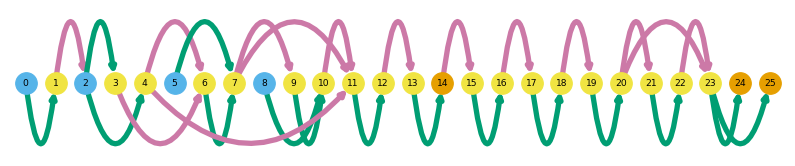

In [68]:
# plot a gene summary graph for the given gene
sg.plot_graph('ADRM1')

Gene summary graphs are a type of graph plot and therefore have plotting options that allow the user to highlight nodes and edges that are either not present in the annotation with the `indicate_novel=True` option.

For instance, say we want to highlight the nodes and edges that are not seen in the annotation. In this representation, nodes (splice sites) that are not present in the annotation will appear outlined, and intronic or exonic regions (edges) that are not present in the annotation will appear dashed.  

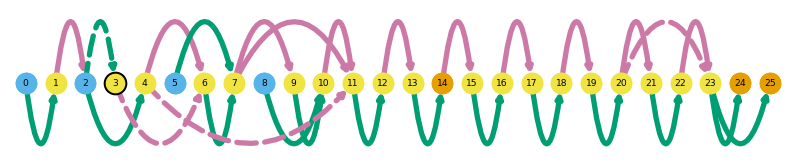

In [69]:
# plot a gene summary graph with novel splice sites and 
# splice junctions plotted as outlined nodes and dashed edges respectively
sg.plot_graph('ADRM1', indicate_novel=True)

<!-- Similarly, you can highlight the nodes that come from a specific dataset. Outlined nodes and dashed edges are those that are present in the queried dataset. -->

In [29]:
# # plot a gene summary graph without displaying it
# sg.plot_graph('ADRM1', indicate_novel=True, display=False)

## <a name="transcript_path"></a>Transcript path graphs


Transcript path graphs display the same structure as gene summary graphs but gray out nodes and edges (splice sites and intronic/exonic regions) that are not present in the given transcript. In this case, the transcript id field is needed to plot the path.

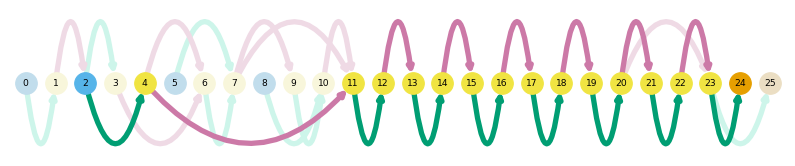

In [70]:
# plot the path of a specific transcript through its parent gene
# summary graph for a given transcript
sg.plot_transcript_path('TALONT000301961')

You can use the `indicate_novel=True` option for transcript path Swan graphs too.

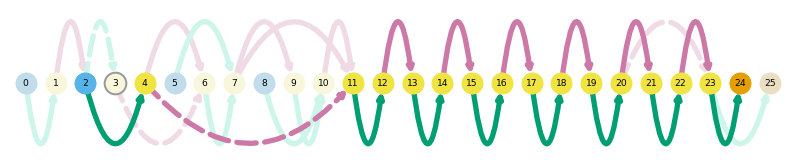

In [71]:
# plot the path of a specific transcript through its parent gene summary
# graph for a given transcript
# plot novel splice sites as outlined nodes
# plot novel splice junctions as dashed edges
sg.plot_transcript_path('TALONT000301961', indicate_novel=True)

For transcripts, there is also a unique option that allows you to generate the genome-browser style representation of a transcript, using the `browser` option.

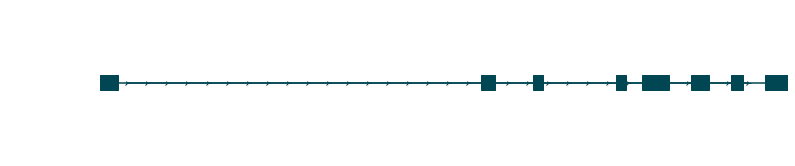

In [72]:
# plot the traditional browser-style representation 
# for a given transcript
sg.plot_transcript_path('TALONT000301961', browser=True)

Additionally, browser plots can be generated with the `plot_browser()` function, which returns a `matplotlib` axis that you can modify, and plot with additional `matplotlib` plots. This function gives you a lot of flexibility with the exact aesthetics of the browser plots.

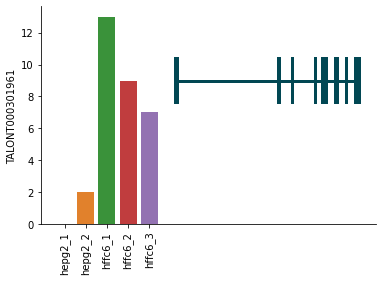

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# plot bar plot of one isoform by cell line and show the isoform with it
tid = 'TALONT000301961'
adata_copy = sg.adata[:, [tid]].copy()
data = adata_copy.X.todense()
obs_ind = adata_copy.obs.index.tolist()
var_ind = adata_copy.var.index.tolist()
df = pd.DataFrame(data=data, columns=var_ind, index=obs_ind)
df.reset_index(inplace=True)
ax = sns.barplot(data=df, 
                 x='index',
                 y=tid)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('')

ax = sg.plot_browser(tid,
                     h=3,
                     w=10,
                     ax=ax,
                     y=7.5,
                     x=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


## <a name="change_colors"></a>Changing colors

If you are unhappy with the default color scheme for the transcript models (both browser and Swan style), Swan now includes an option to change the colors. Use the `SwanGraph.set_plotting_colors()` function using a dictionary that maps the different components of the transcript model (tss, tes, internal, exon, intron, browser) to either a [named Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) or hex code. 

The user doesn't have to supply colors for all of the components. For instance, say we just want to change the color of the introns to purple instead of pink.

In [78]:
cmap = {'intron': 'purple'}
sg.set_plotting_colors(cmap)

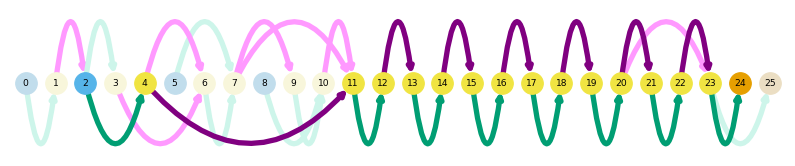

In [79]:
# plot the path of a specific transcript through its parent gene
# summary graph for a given transcript
sg.plot_transcript_path('TALONT000301961')

Of course, you can also change all of the colors too! Beware that Swan will automatically compute a grayed-out version of the color. Try to choose colors that all have similar low "lightness" in HSL space so that the grayed-out components in the transcript path plots are still distinguishable from one another.

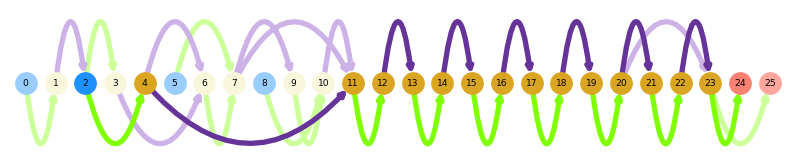

In [80]:
cmap = {'intron': 'rebeccapurple', 'exon': 'chartreuse', 'tss': 'dodgerblue',
        'tes': 'salmon', 'internal': 'goldenrod'}
sg.set_plotting_colors(cmap=cmap)
# plot the path of a specific transcript through its parent gene
# summary graph for a given transcript
sg.plot_transcript_path('TALONT000301961')

You can also change the color of plotted browser figures at the same time by adding a `browser` color to your colormap.

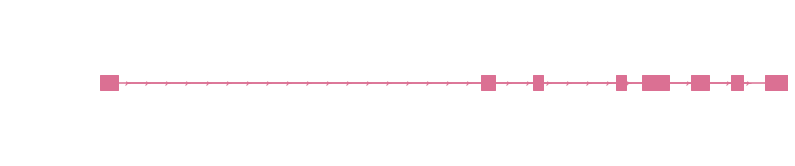

In [81]:
cmap = {'browser': 'palevioletred'}
sg.set_plotting_colors(cmap=cmap)
# plot the path of a specific transcript in browser format
sg.plot_transcript_path('TALONT000301961', browser=True)

If at any point you want to revert to the default color settings, you can run the following.

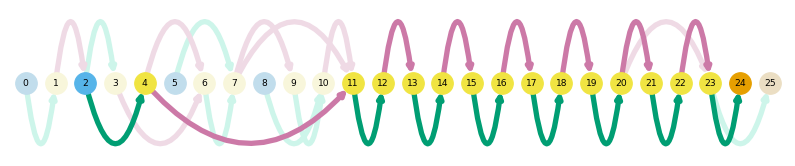

In [83]:
sg.set_plotting_colors(default=True)
sg.plot_transcript_path('TALONT000301961')

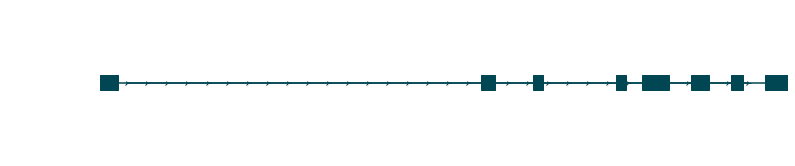

In [84]:
sg.plot_transcript_path('TALONT000301961', browser=True)

## <a name="save_fig"></a>Saving a figure

Saving a figure in Swan for `plot_graph` and for `plot_transcript_path` can be done in two different ways.

The first way involves calling `save_fig` after your figure has been generated. This method allows you to give your figure whatever name you want.

In [85]:
# plot gene summary graph for a given gene
sg.plot_graph('ADRM1')

# save the currently-plotted figure with the given filename and location
swan.save_fig('figures/my_gene_summary.png')

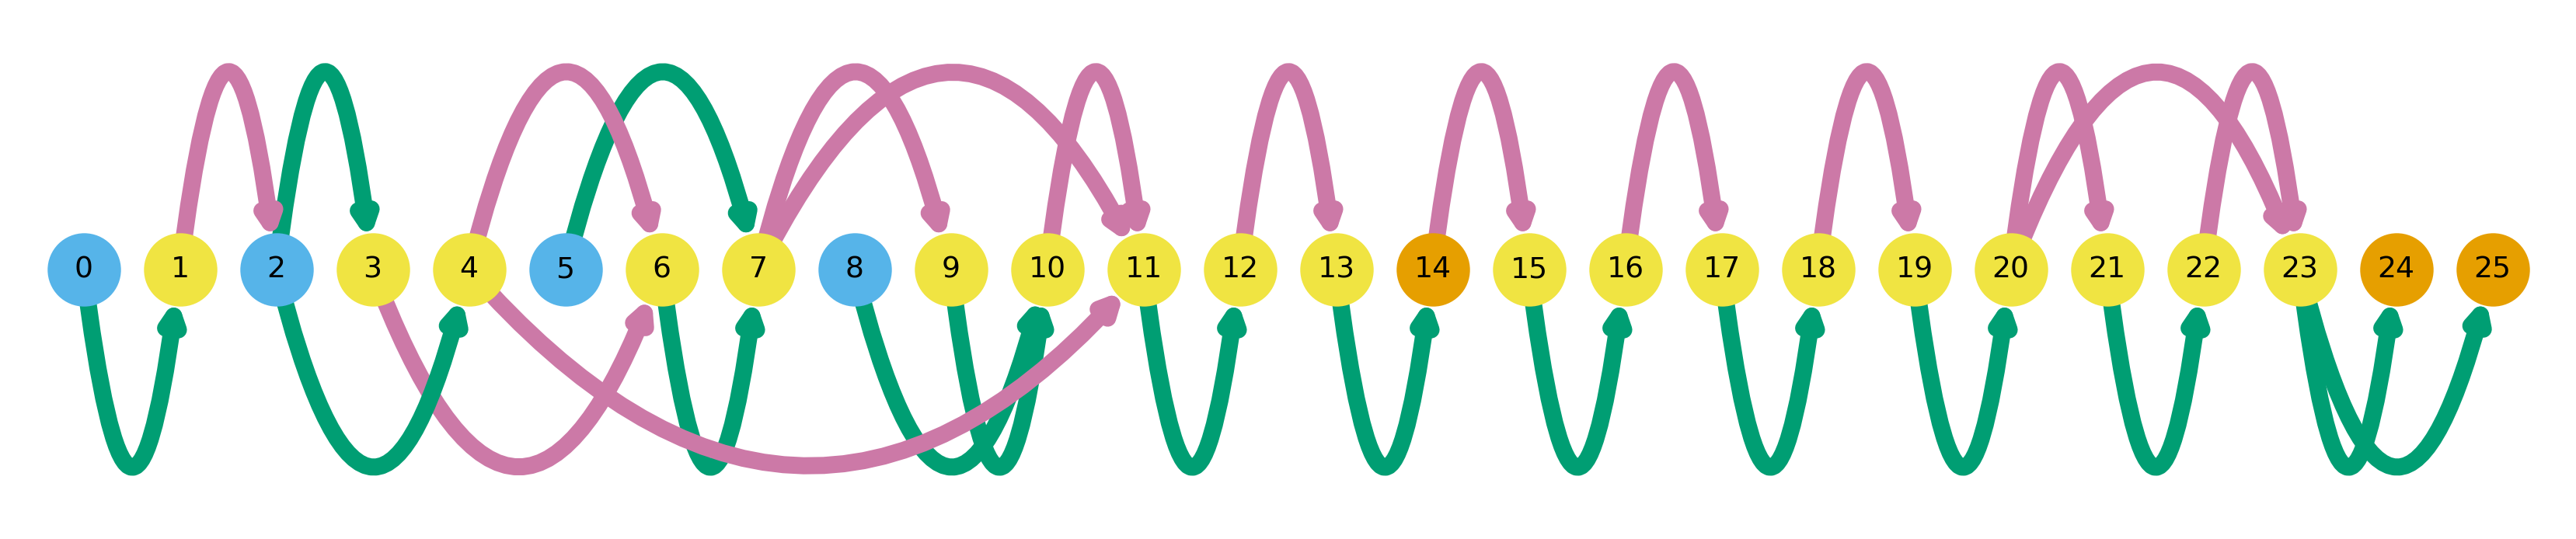

In [86]:
display(Image(filename='figures/my_gene_summary.png'))

The second way only requires one line of code and requires that the user pass the corresponding plotting function a `prefix` for the filename and path. The file will be automatically named according to the settings in the graph.

In [87]:
# plot a gene summary graph with novel splice sites and junctions
# outlined and dashed respectively
# save the figure with the given prefix
sg.plot_graph('ADRM1', indicate_novel=True, prefix='figures/adrm1')

Saving summary graph for ENSG00000130706 as figures/adrm1_novel_ENSG00000130706_summary.png


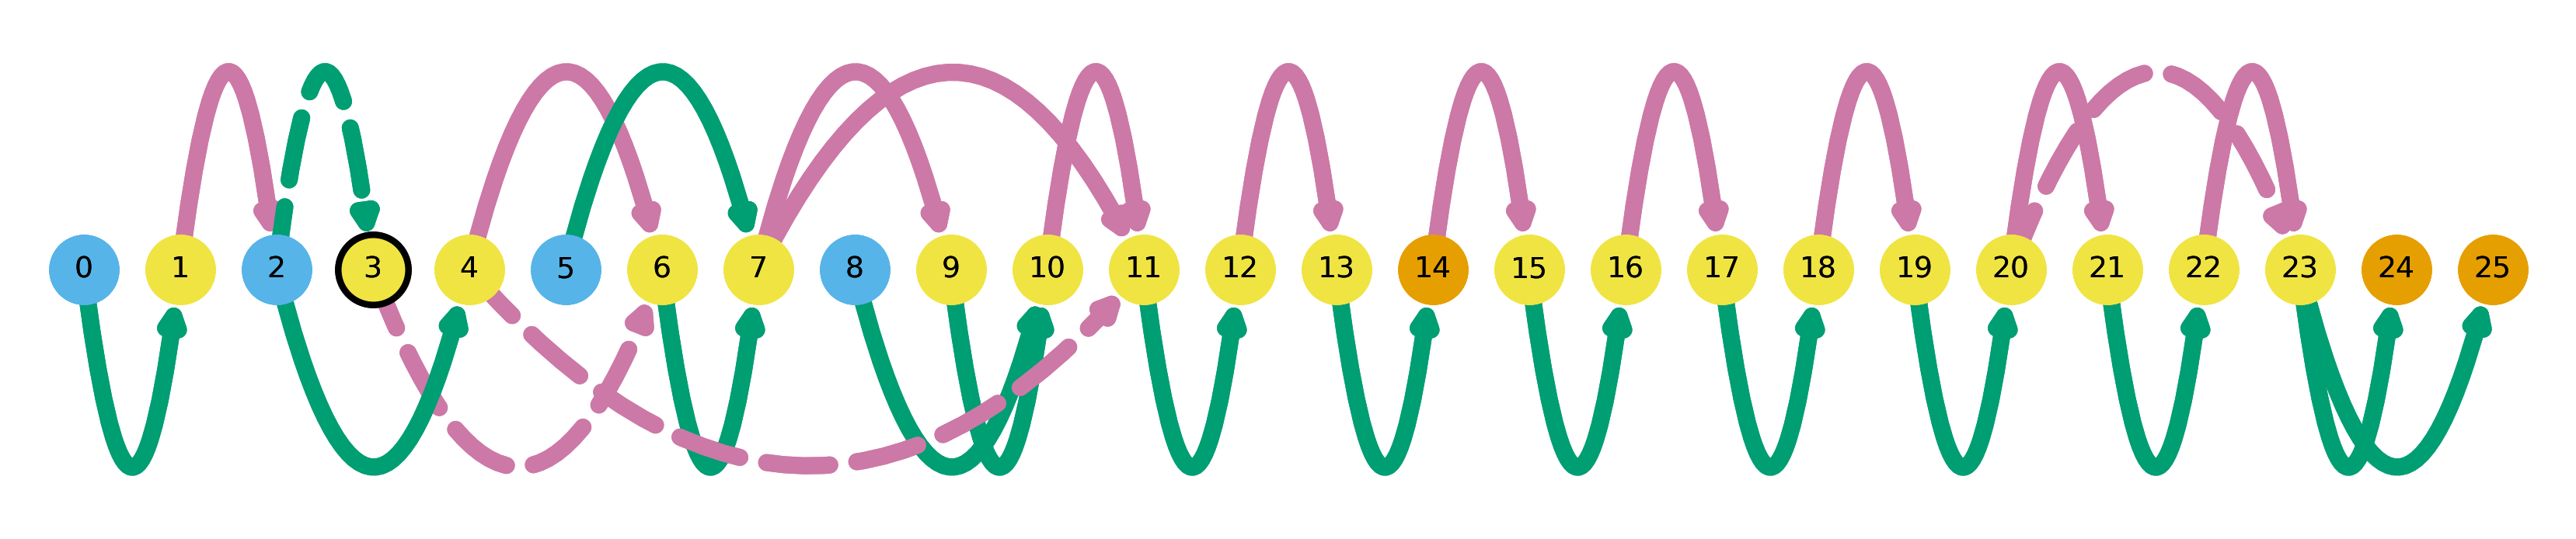

In [88]:
display(Image(filename='figures/adrm1_novel_ENSG00000130706.12_summary.png'))

As you can see, here the gene name _ADRM1_ is not used to save the figure in order to avoid duplicate gene names. To avoid these clashes, Swan automatically fetches the gene id associated with the first instance of the gene name it finds and uses it to save the graph, in the interest of not accidentally overwriting a preexisting file.

## <a name="swan_report"></a>Swan reports

Swan reports display all the expressed transcripts in a given gene in a PDF format. There are many ways to customize these reports so here are a few. Unlike the above plotting options, the user must provide a `prefix` argument as there are many files that must be automatically generated to create the report.

In [89]:
# generate a report for the given gene 
# save it with the given filepath prefix
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg.gen_report('ADRM1',
              prefix='figures/adrm1_paper',
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000130706
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_paper_novel_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_paper_novel_TALONT000301961_path.png
Generating report for ENSG00000130706


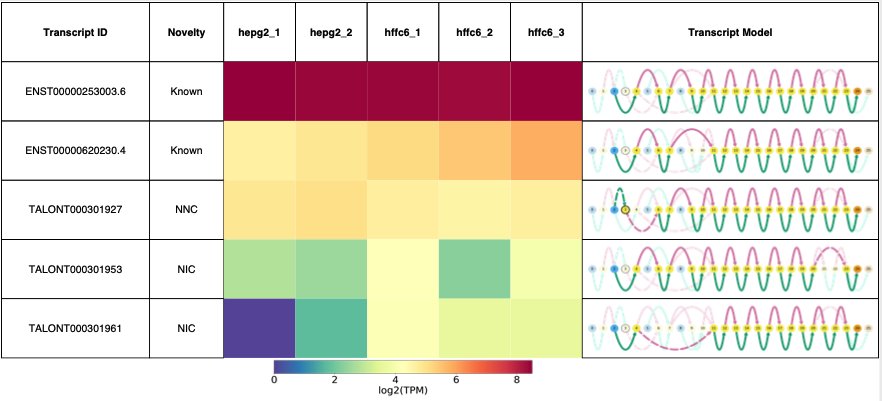

In [44]:
display(Image(filename='figures/adrm1_paper_novel_ENSG00000130706.12_report.png'))

You can also plot transcripts based on their percent isoform (pi) values using `layer=pi`, which help illustrate the basis on which isoform switches are called in Swan. Here I'm choosing to plot it in a separate color using the `cmap` argument to make it clear that the metric being plotted is different, and overlaying each cell with the pi value using `display_numbers=True`. 

For this example, I'll plot a gene that was called as isoform switching by the Swan isoform switching module, NIPAL3.

In [2]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg = swan.read('data/swan.p')
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True)

Read in graph from data/swan.p

Plotting transcripts for ENSG00000001461
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461


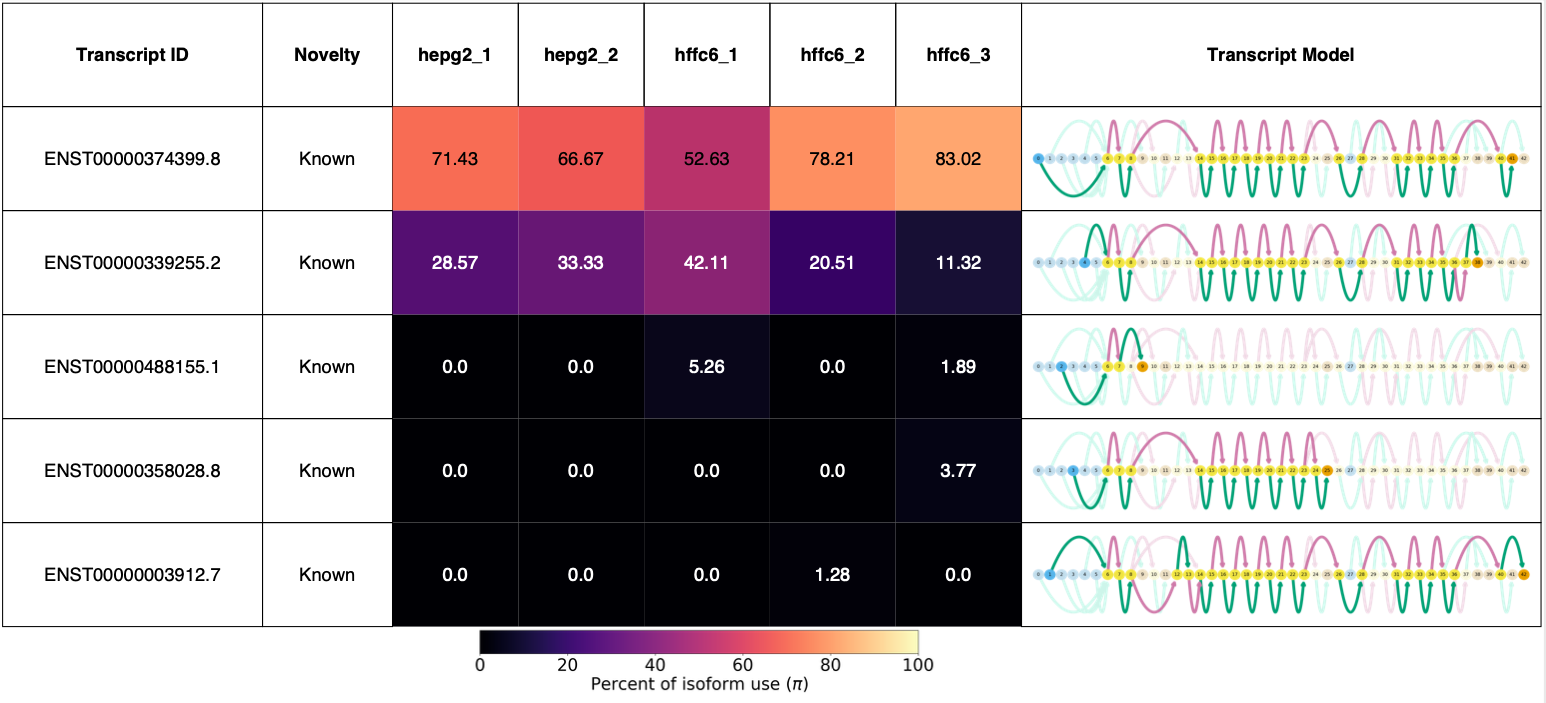

In [48]:
display(Image(filename='figures/nipal3_novel_ENSG00000001461.16_report.png'))

In these cases, it can be beneficial to actually look at the data in the original groups that the isoform switching test was performed. To group your input samples by a metadata column that can be found in `sg.adata.obs` in the report, use the `groupby` option. Here, I've also demonstrated that if you have transcript names in your GTF or TALON db, that those can be displayed instead of the transcript IDs using `transcript_name=True`.

In [4]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True,
              groupby='cell_line',
              transcript_col='tname')


Plotting transcripts for ENSG00000001461
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461


Using this strategy, the basis of the isoform switch is a little clearer. The longer isoform, NIPAL3-204, is proportionally higher-expressed in HFFc6, wherease NIPAL3-202 is proportionally higher-expressed in HepG2.

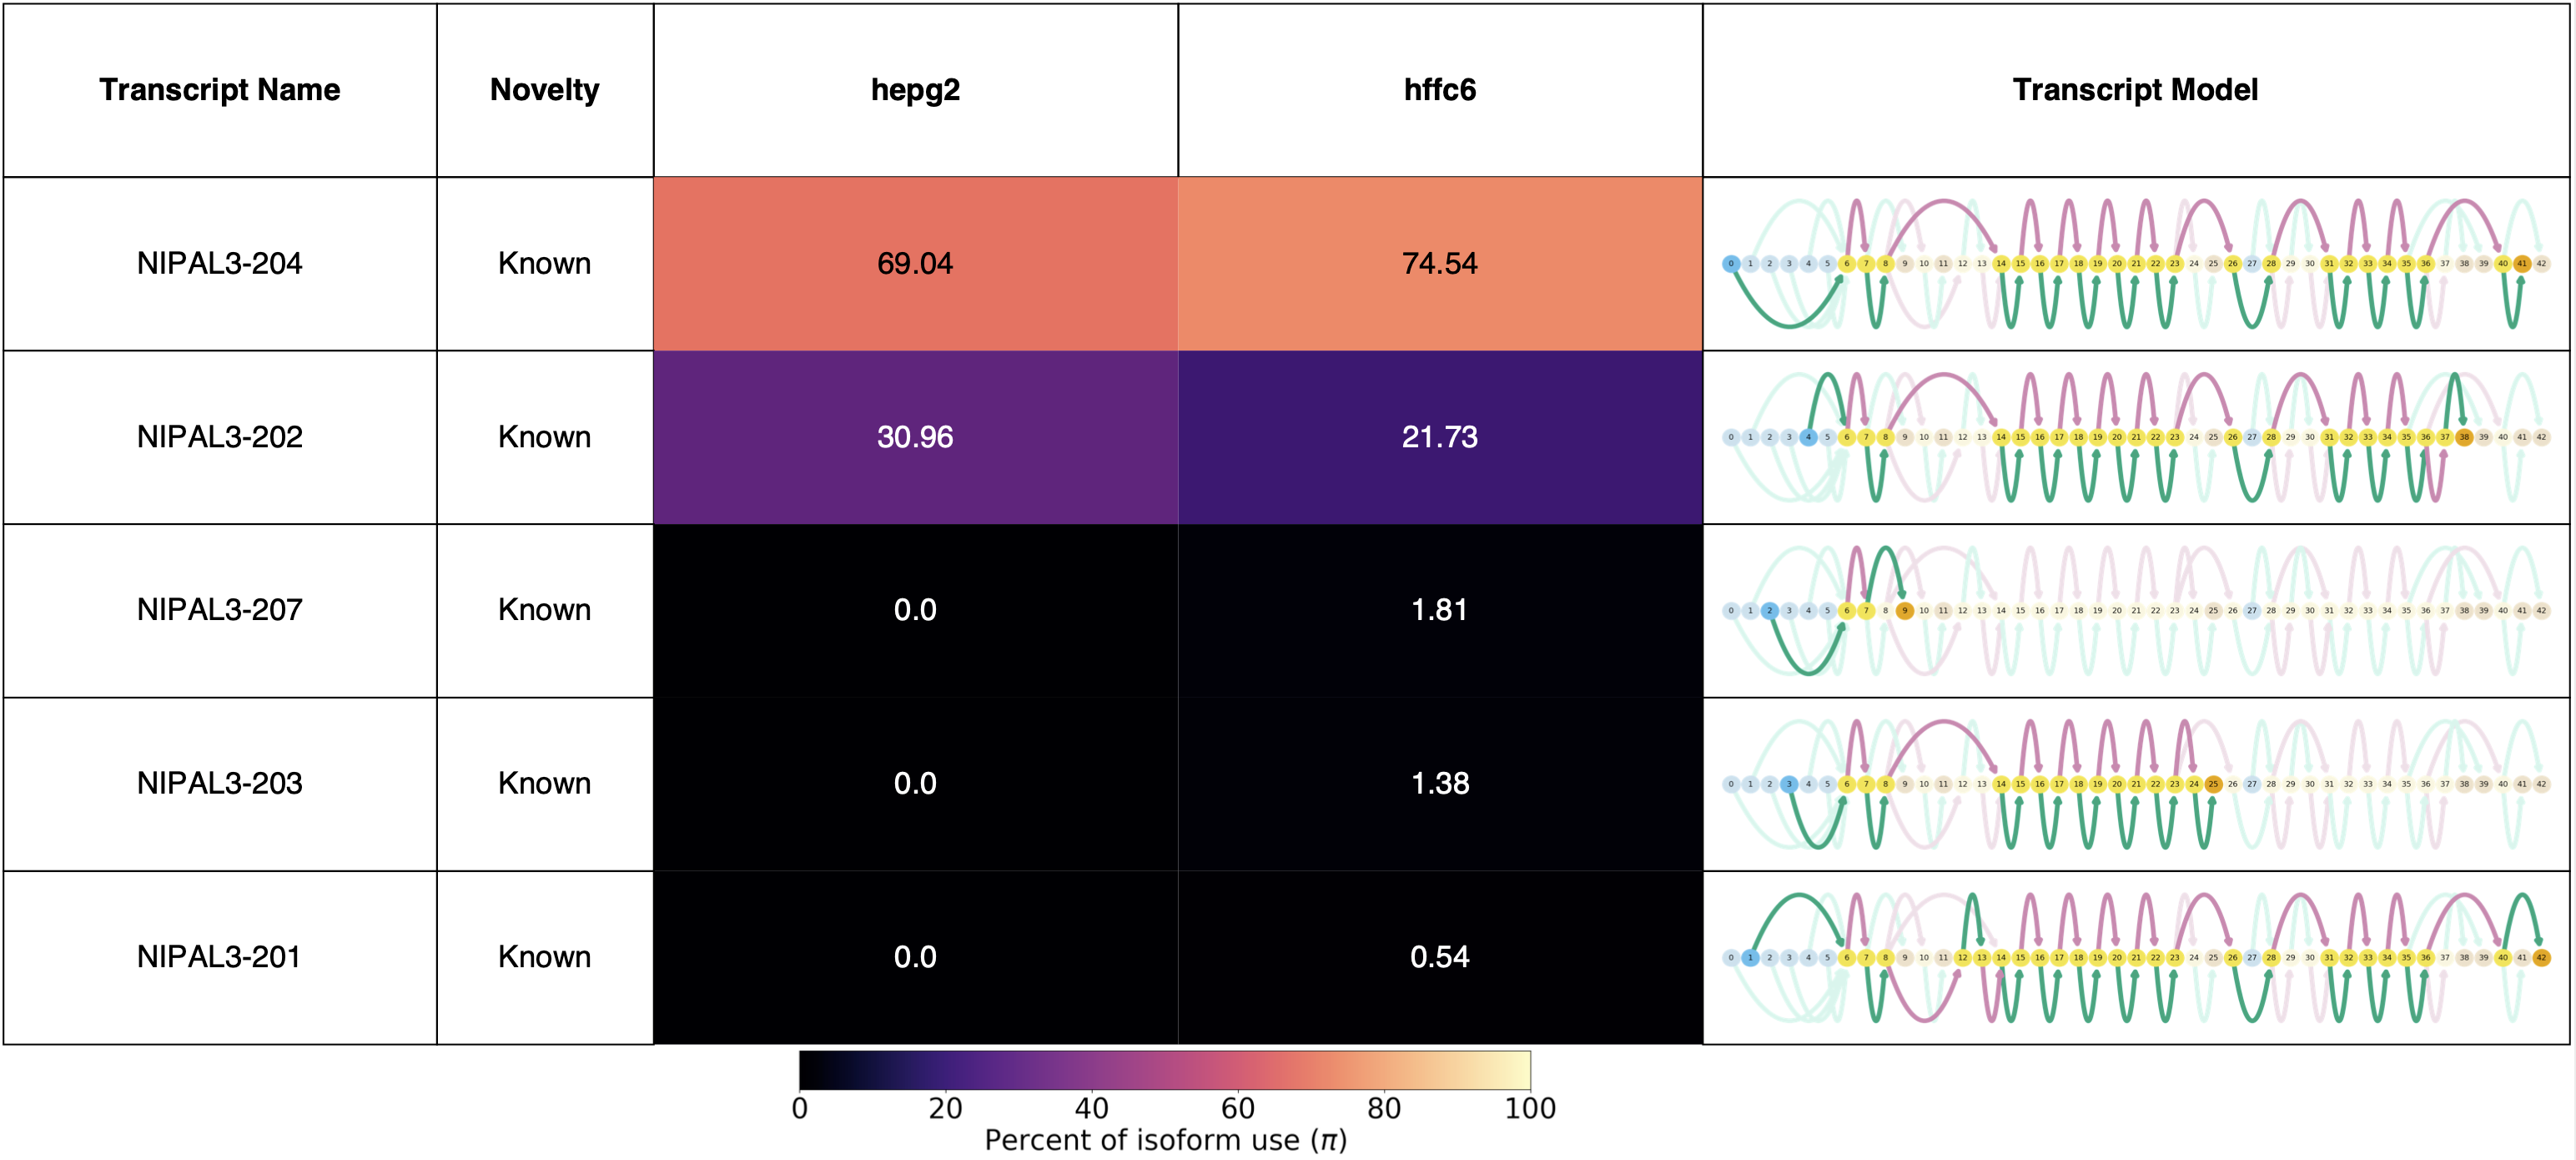

In [50]:
display(Image(filename='figures/nipal3_novel_cell_line_ENSG00000001461.16_report.png'))

Swan now supports using colors to represent metadata categories which can be useful for more complex sets of samples. Swan cannot automatically resize dataset names for gene reports and therefore I recommend using this strategy when plotting a large number of datasets.

First, assign colors to different metadata columns in `sg.adata.obs`. You can use hexcodes or [named Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

In [5]:
sg.set_metadata_colors('cell_line', {'hepg2': 'gold', 'hffc6': '#ba55d3'})

Then use the `metadata_cols` option to indicate what colored metadata categories you'd like to plot at the top of the gene report. Here I'm also demonstrating the option to plot the browser-style transcript representation using the `browser=True` option.

In [6]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
# color cell lines by metadata colors
# plot the genome browser representation of the transcript models
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              groupby='cell_line',
              transcript_col='tname', 
              metadata_cols=['cell_line'],
              browser=True)


Plotting transcripts for ENSG00000130706
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706


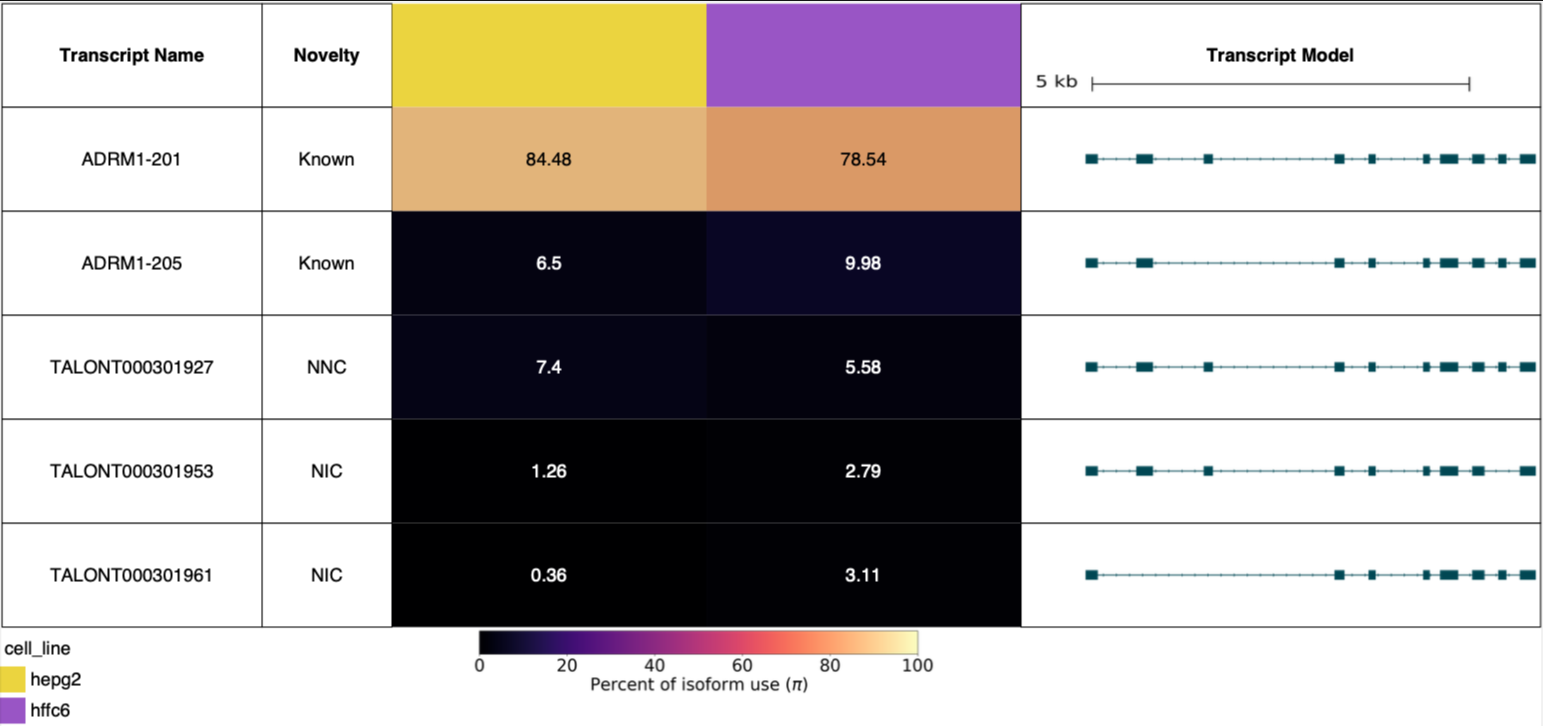

In [9]:
# todo - swap out
display(Image(filename='figures/adrm1_browser_color_cell_line_ENSG00000130706.12_report.png'))

You can also include more than one metadata column to color.

In [6]:
# from lighter to darker blue
sg.set_metadata_colors('replicate', {'1': '#bef4ff', 
                                     '2': '#73a8b2', 
                                     '3': '#263133'})

In [12]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# color cell lines and replicates by metadata colors
# plot the genome browser representation of the transcript models
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              cmap='viridis',
              display_numbers=True,
              novelty=True, 
              transcript_col='tname',
              metadata_cols=['cell_line', 'replicate'],
              browser=True)


Plotting transcripts for ENSG00000130706
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706


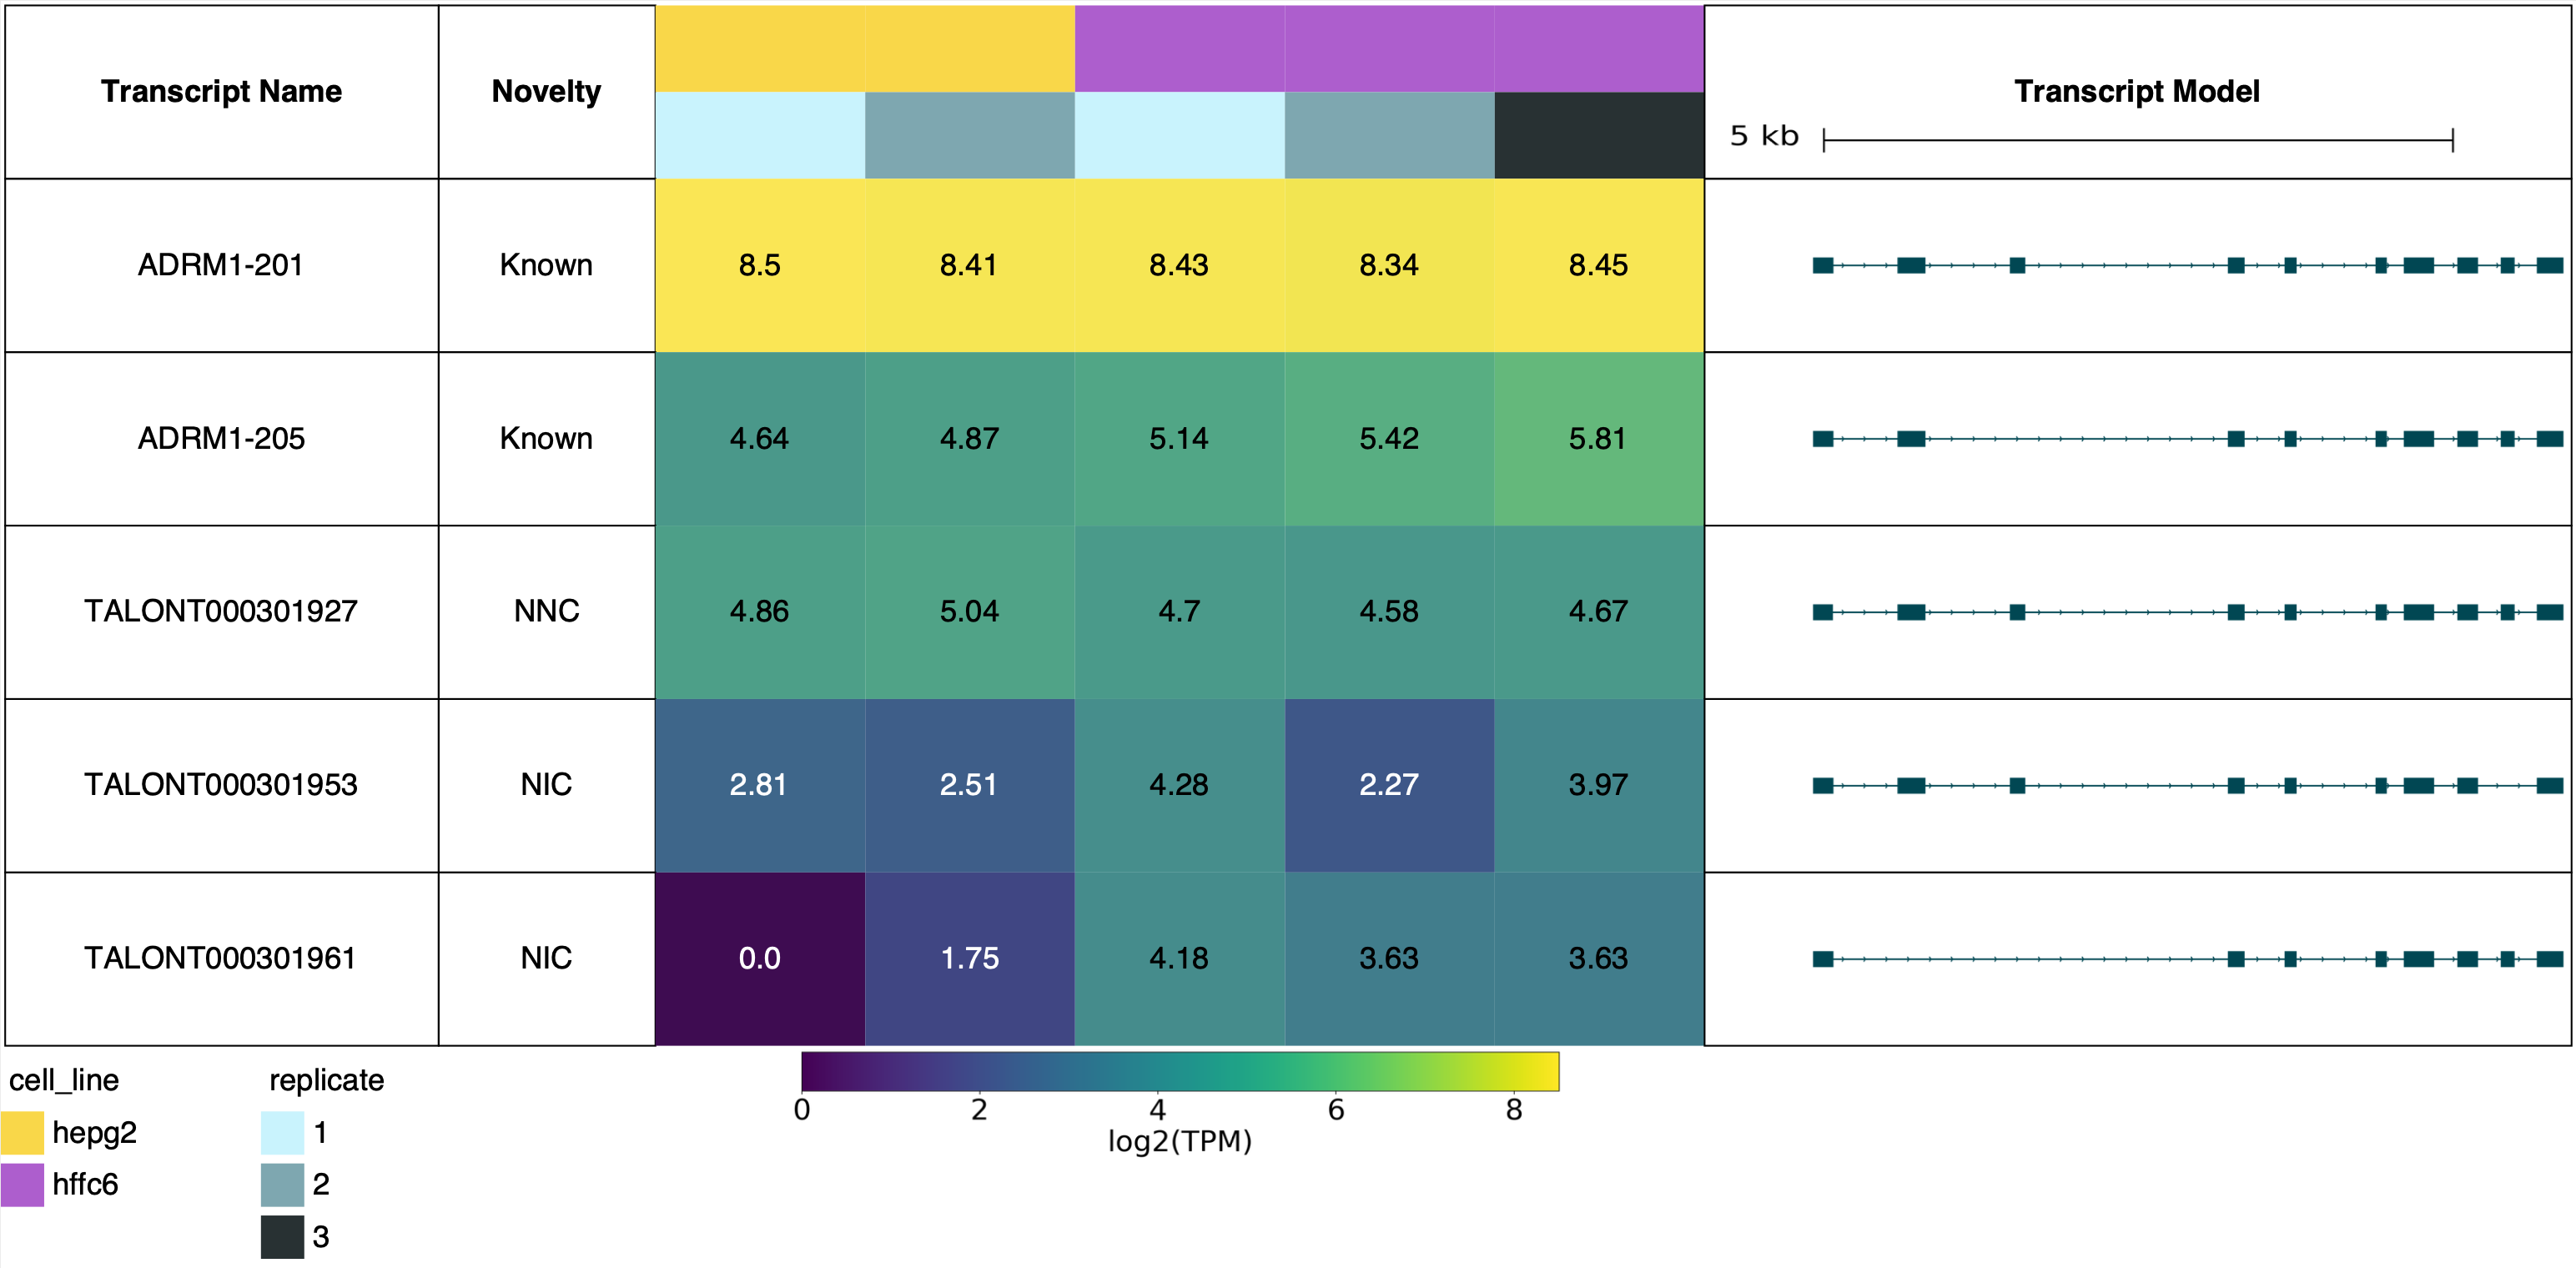

In [56]:
display(Image(filename='figures/adrm1_browser_color_replicate_cell_line_ENSG00000130706.12_report.png'))

Note that if I try to use the `groupby='cell_line'` option with `metadata_cols=['cell_line', 'replicate']`, Swan will throw an error because there are multiple distinct replicates that belong to each cell line which makes the groupby impossible.

In [57]:
# example of incompatible groupby and metadata_cols pairing
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              groupby='cell_line',
              metadata_cols=['cell_line', 'replicate'])

Exception: Metadata column replicate not compatible with groupby column cell_line. Groupby column has more than 1 unique possible value from metadata column.

You can also use multiple different metadata categories to groupby if you provide them as a list. For this, we'll take a look at a different, more complex dataset with the following metadata.

In [1]:
brain_sg = swan.read('data/swan_modelad.p')
c_dict = {'hippocampus': 'deeppink', 'cortex': 'darkorchid'}
brain_sg.set_metadata_colors('sample', c_dict)
c_dict = {'b6n': '#bef4ff', '5xfad': '#73a8b2'}
brain_sg.set_metadata_colors('genotype', c_dict)
brain_sg.adata.obs.head()

Read in graph from data/swan_modelad.p


dataset  total_counts ENCODE_file_id  \
index                                                                     
cortex_wt_f_1_1            cortex_wt_f_1_1     1639318.0    ENCFF505EPC   
cortex_5x_f_1_1            cortex_5x_f_1_1     1633550.0    ENCFF211JXU   
hippocampus_5x_f_1_1  hippocampus_5x_f_1_1     1505415.0    ENCFF033LIM   
cortex_wt_f_1_2            cortex_wt_f_1_2     1854086.0    ENCFF525AQR   
cortex_wt_m_2_2            cortex_wt_m_2_2     2227137.0    ENCFF149EOM   

                     ENCODE_experiment_id       sample sample_display  \
index                                                                   
cortex_wt_f_1_1               ENCSR131CES       cortex         Cortex   
cortex_5x_f_1_1               ENCSR280VKU       cortex         Cortex   
hippocampus_5x_f_1_1          ENCSR060OTU  hippocampus    Hippocampus   
cortex_wt_f_1_2               ENCSR131CES       cortex         Cortex   
cortex_wt_m_2_2               ENCSR644GDT       cortex         Cortex   

                     general_tissue_cell_type fig1_tissue_label  age adult  \
index                                                                        
cortex_wt_f_1_1                        cortex            cortex  NaN  True   
cortex_5x_f_1_1                        cortex            cortex  NaN  True   
hippocampus_5x_f_1_1              hippocampus       hippocampus  NaN  True   
cortex_wt_f_1_2                        cortex            cortex  NaN  True   
cortex_wt_m_2_2                        cortex            cortex  NaN  True   

                     sex genotype tissue_or_cell_line sample_color_hex_code  \
index                                                                         
cortex_wt_f_1_1        f      b6n              tissue               #634273   
cortex_5x_f_1_1        f    5xfad              tissue               #634273   
hippocampus_5x_f_1_1   f    5xfad              tissue               #9a3c4f   
cortex_wt_f_1_2        f      b6n              tissue               #634273   
cortex_wt_m_2_2        m      b6n              tissue               #634273   

                                             matching_human_samples  \
index                                                                 
cortex_wt_f_1_1       ['brain', 'pgp1_excite_neuron', 'pgp1_astro']   
cortex_5x_f_1_1       ['brain', 'pgp1_excite_neuron', 'pgp1_astro']   
hippocampus_5x_f_1_1  ['brain', 'pgp1_excite_neuron', 'pgp1_astro']   
cortex_wt_f_1_2       ['brain', 'pgp1_excite_neuron', 'pgp1_astro']   
cortex_wt_m_2_2       ['brain', 'pgp1_excite_neuron', 'pgp1_astro']   

                     reads_post_talon  
index                                  
cortex_wt_f_1_1               2016725  
cortex_5x_f_1_1               1976211  
hippocampus_5x_f_1_1          1862373  
cortex_wt_f_1_2               2259132  
cortex_wt_m_2_2               2740617

Say we want to group replicates belonging to the same brain region and genotype together in the report. We can do this by using `groupby=['sample', 'genotype']` as input to `gen_report()`.

In [2]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the magma color way
# display values on top of each cell
# use the percent isoform (pi) layer
# display the novelty category associated with the transcript 
# color legend based on brain region and age
# group datasets with the same brain region and age together
brain_sg.gen_report('Srf',
              prefix='figures/srf',
              cmap='magma',
              layer='pi',
              display_numbers=True,
              novelty=True, 
              transcript_col='tname',
              metadata_cols=['sample', 'genotype'],
              groupby=['sample', 'genotype'])


Plotting transcripts for ENSMUSG00000015605
Saving transcript path graph for ENSMUSG00000015605[2,2,2] as figures/srf_ENSMUSG00000015605[2,2,2]_path.png
Saving transcript path graph for ENSMUSG00000015605[1,6,4] as figures/srf_ENSMUSG00000015605[1,6,4]_path.png
Saving transcript path graph for ENSMUSG00000015605[1,1,1] as figures/srf_ENSMUSG00000015605[1,1,1]_path.png
Generating report for ENSMUSG00000015605


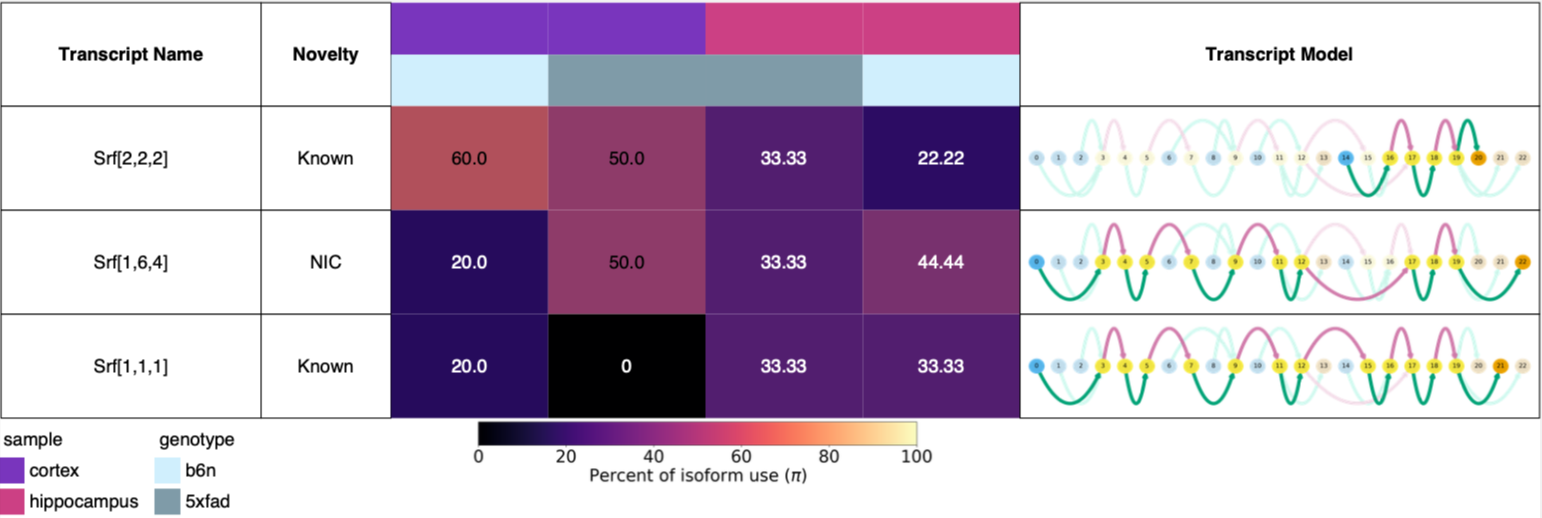

In [5]:
display(Image(filename='figures/srf_ENSMUSG00000015605.6_report.png'))

You can choose which datasets and the order in which they display in the report using the `datasets` option combined with different metadata. Suppose we want to restrict the datasets in the report to just the HFFc6 datasets, and we want to display the replicates 2 and 3 only, in descending order. Specify which categories from the relevant metadata columns you wish to include using a dictionary with the format `{metadata_column: [metadata_category1, metadata_category2 ...]}`. The output report will include the intersection of datasets that satisfy each condition. 

Here I've also demonstrated the `order` option, where you can order the transcripts based on transcript ID, expression level (default), or genomic location of TSS / TES (`[tid', 'expression', 'tss', 'tes']` respectively).

In [7]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# color cell lines by metadata colors
# restrict data shown to just the hffc6 cell line and replicates 3 and 2
# order transcripts based on genomic location of TSS
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              cmap='viridis',
              metadata_cols=['cell_line', 'replicate'],
              datasets={'cell_line': 'hffc6', 'replicate': ['3', '2']},
              order='tss')


Plotting transcripts for ENSG00000001461
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_ENST00000003912.7_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_ENST00000339255.2_path.png
Generating report for ENSG00000001461


As you can see here, the data displayed is limited to those belonging to hffc6 replicates 2 and 3, and we display replicates 3 and 2 in a specific order.

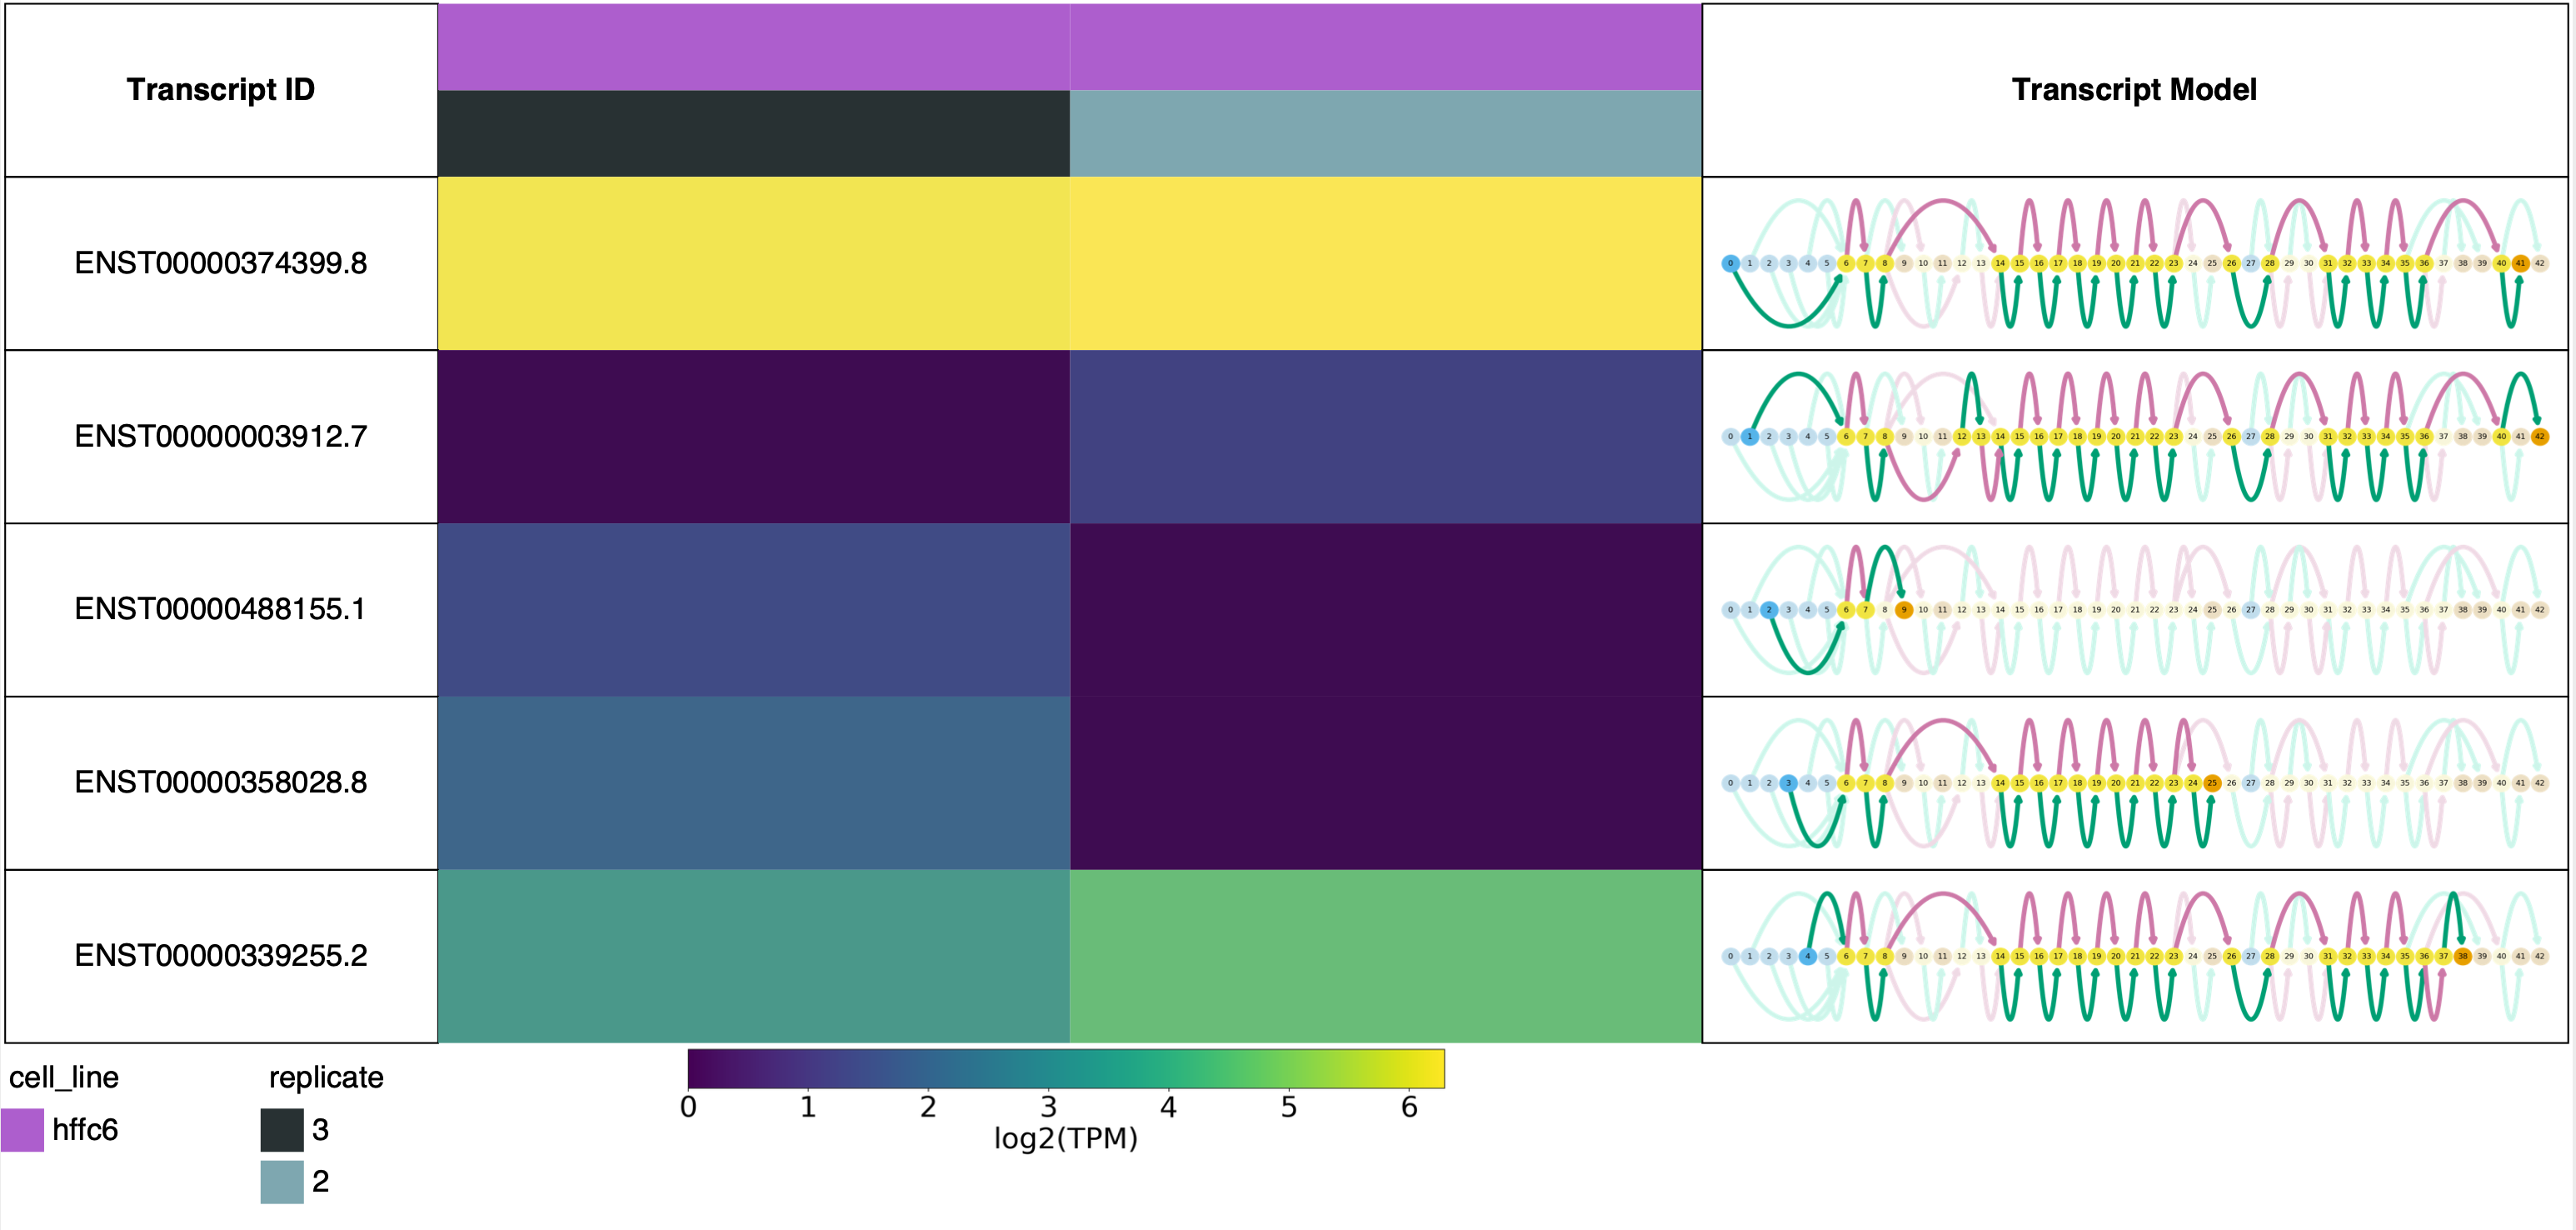

In [68]:
display(Image(filename='figures/nipal3_ENSG00000001461.16_report.png'))

And here I'll show all the hffc6 replicates ordered by tes.

In [8]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# color cell lines and replicates by metadata colors
# restrict data shown to just the hffc6 datasets
# order transcripts based on genomic location of TES
# use browser-style representation
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              cmap='viridis',
              metadata_cols=['cell_line', 'replicate'],
              datasets={'cell_line': 'hffc6'},
              order='tes',
              browser=True)


Plotting transcripts for ENSG00000001461
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_browser_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_browser_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_browser_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_browser_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_browser_ENST00000003912.7_path.png
Generating report for ENSG00000001461


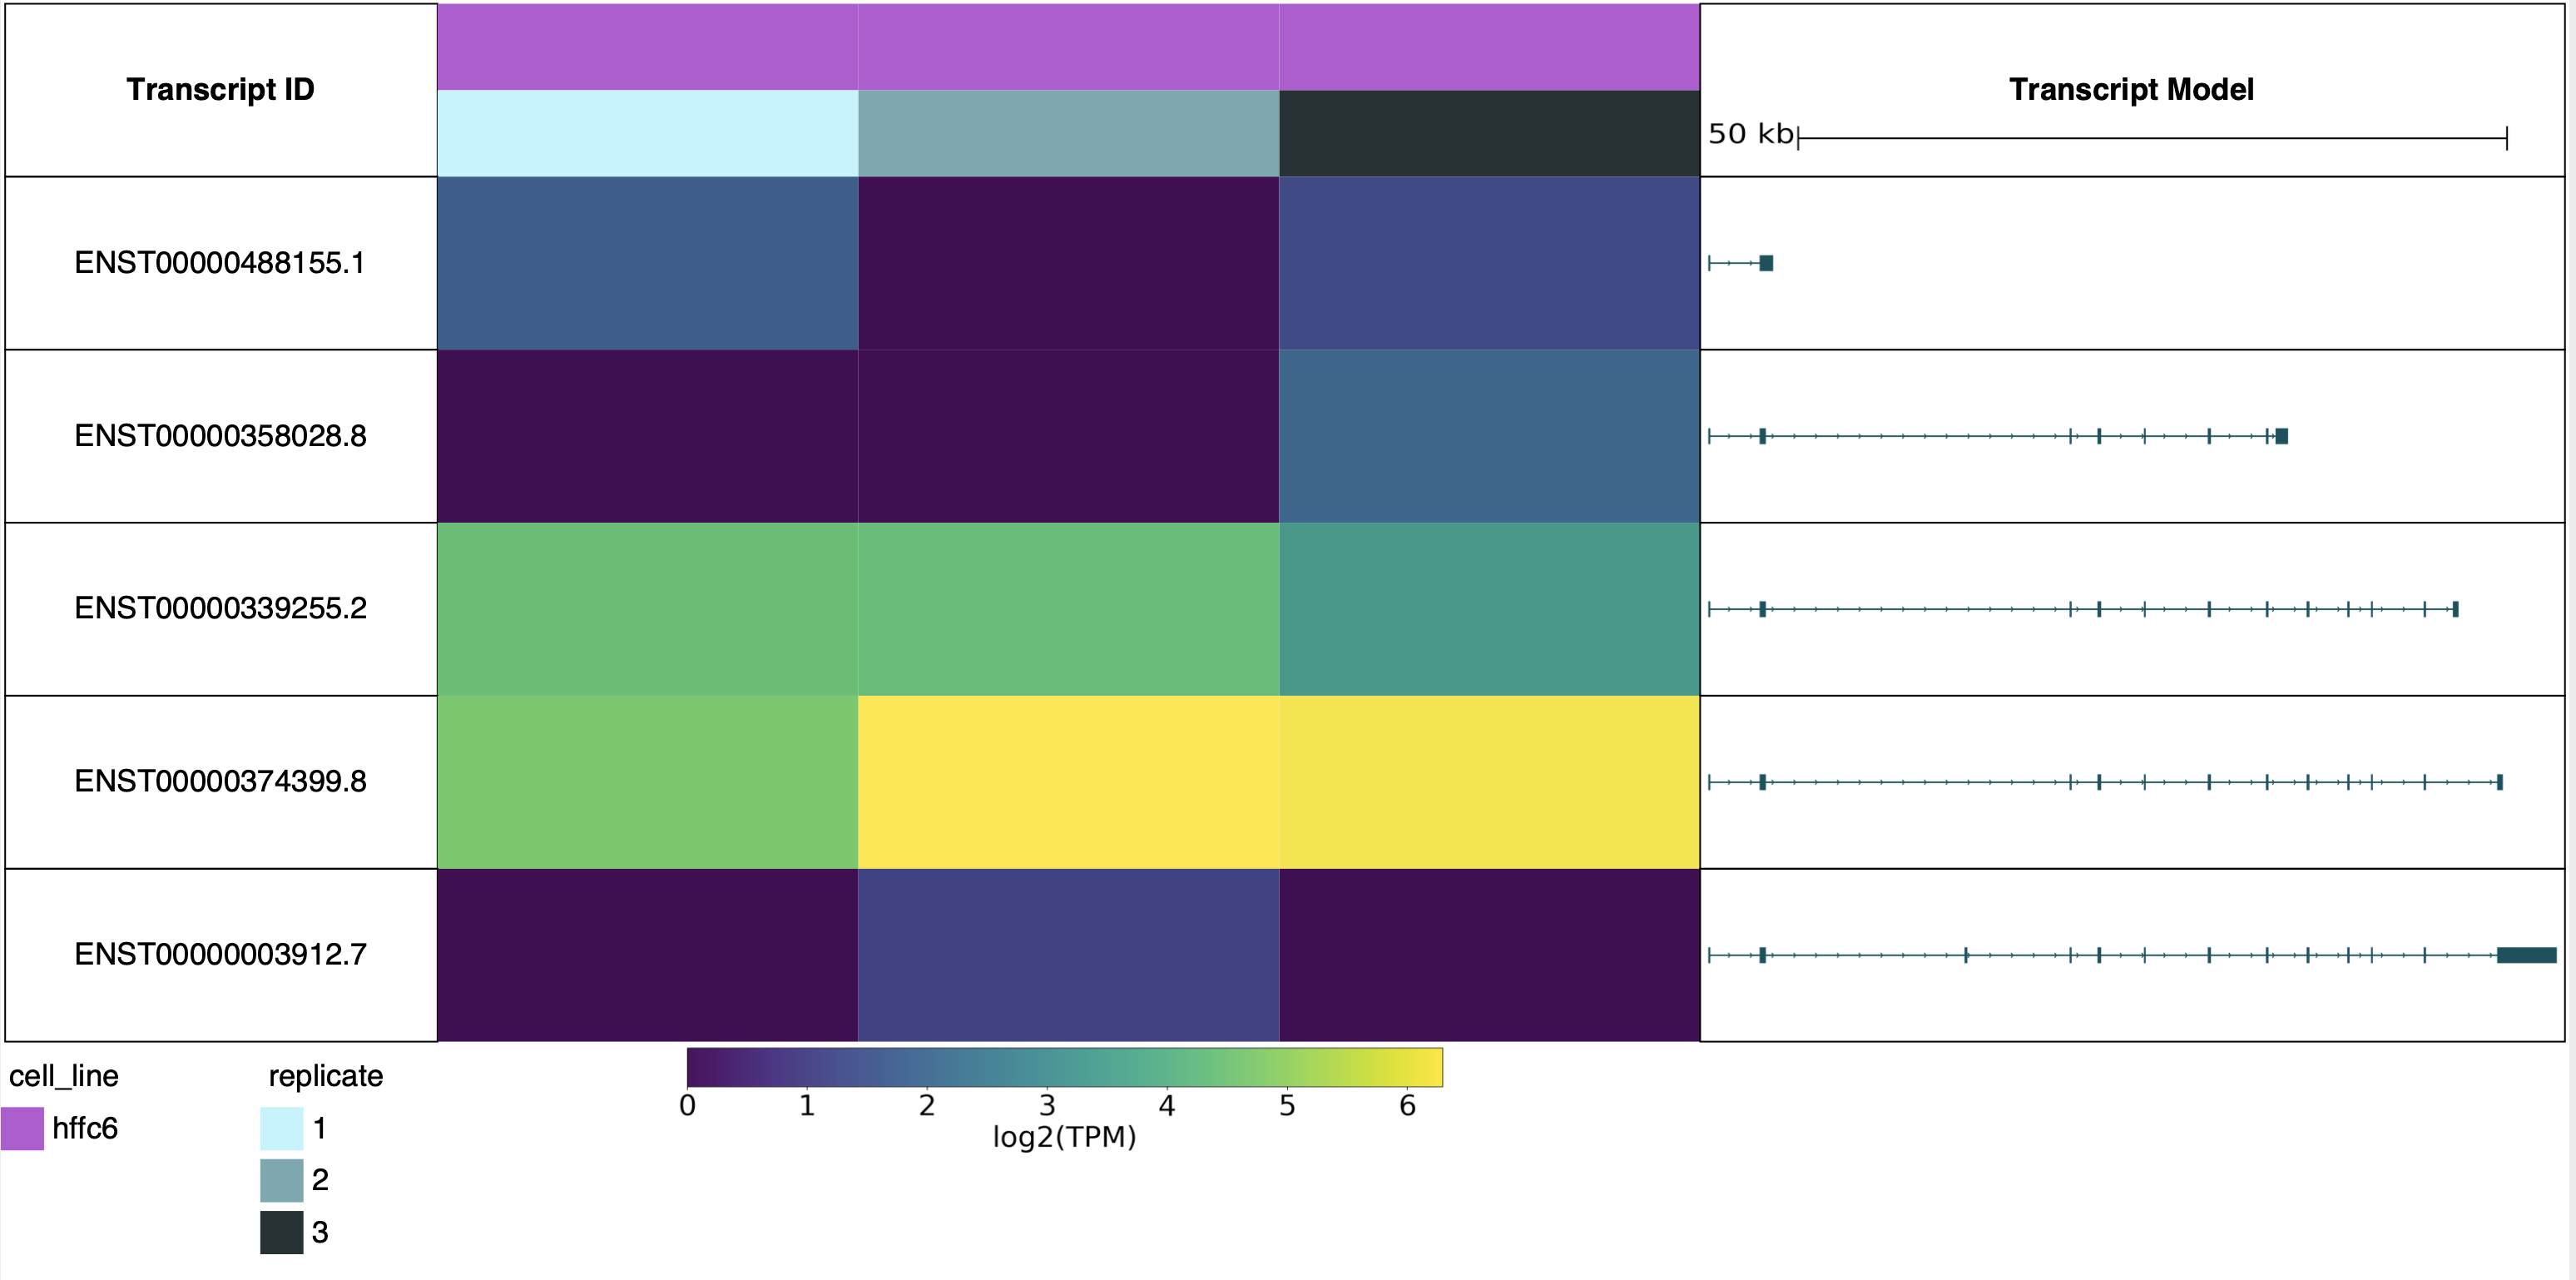

In [70]:
display(Image(filename='figures/nipal3_browser_hffc6_ENSG00000001461.16_report.png'))